In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param





/mnt/c/Users/jam60/OneDrive/Repos/vivaldi/back_testing


In [2]:
def load_config():
    my_config = {}
    with open('config.config') as config:
        for line in config:
            args = line.split('=')
            my_config[args[0]] = args[1].rstrip().split(',')
    return my_config

model = Trading(load_config())
dataset = model.dfs[0][0]

In [3]:

optimal = Optimal_v2(_params=[], _name='optimal')
optimal.genData(dataset, gen_new_values=False)

In [4]:
def map_to_price_entry(row):
    if row.optimal > 0.9:
        return row.close
    else:
        return None

def map_to_price_exit(row):
    if row.optimal < -0.9:
        return row.close
    else:
        return None

In [5]:
dataset['optimal_entry'] = dataset.apply(lambda x: map_to_price_entry(x), axis=1)
dataset['optimal_exit'] = dataset.apply(lambda x: map_to_price_exit(x), axis=1)

In [6]:
dataset['close'].isnull().values.any()

False

In [7]:
dataset

,time,open,high,low,close,volume,trades,optimal,optimal_entry,optimal_exit
3411206,1585767660,6205.2,6206.1,6204.0,6206.000000,2.606424,9,0.066667,NaN,NaN
3411207,1585767720,6207.6,6208.0,6206.0,6206.066667,3.954042,8,0.000000,NaN,NaN
3411208,1585767780,6206.0,6206.1,6206.0,6206.085714,1.073439,4,-0.000000,NaN,NaN
3411209,1585767840,6206.1,6206.1,6206.0,6206.040000,0.399791,6,0.000000,NaN,NaN
3411210,1585767900,6206.0,6206.3,6206.0,6206.174194,0.019018,3,-0.044444,NaN,NaN
3411211,1585767960,6206.0,6206.1,6206.0,6206.085714,0.200336,3,0.000000,NaN,NaN
3411212,1585768020,6206.1,6206.1,6203.0,6204.530709,6.128000,10,0.000000,NaN,NaN
3411213,1585768080,6203.1,6206.0,6201.9,6203.210196,2.545108,11,0.000000,NaN,NaN
3411214,1585768140,6201.4,6201.4,6201.0,6202.102935,1.560819,13,0.000000,NaN,NaN
3411215,1585768200,6200.4,6200.7,6200.3,6201.400782,1.252591,4,0.000000,NaN,NaN


<Figure size 432x288 with 0 Axes>

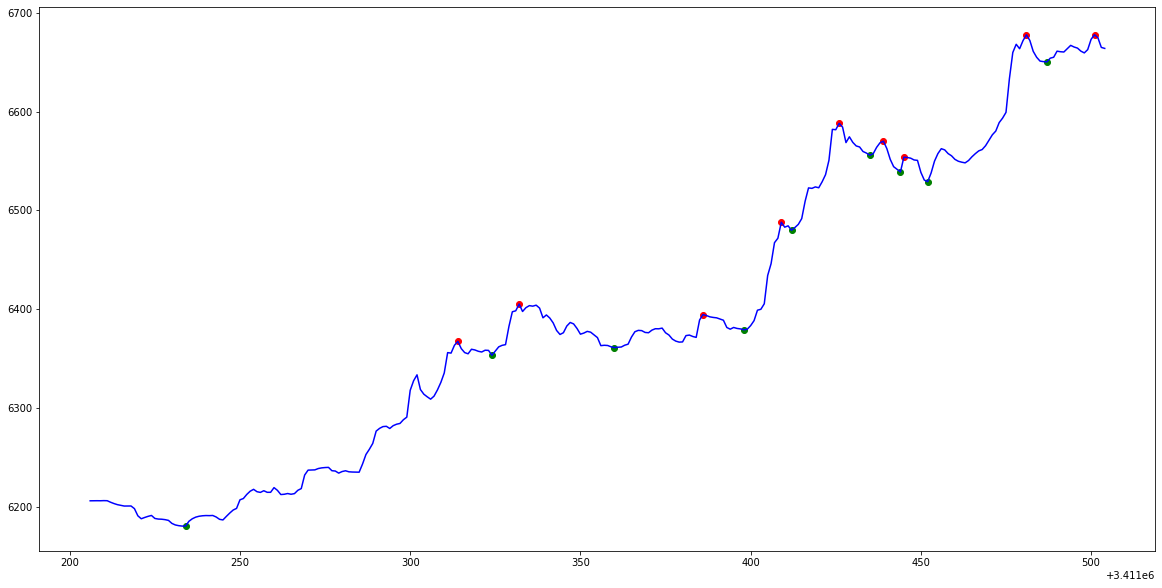

In [8]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(20,10))
plt.scatter(x=dataset.index, y=dataset['optimal_entry'], color='green')
plt.scatter(x=dataset.index, y=dataset['optimal_exit'], color='red')

plt.plot(dataset.index, dataset['close'], color='blue')
plt.show()